In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

Using TensorFlow backend.


In [6]:
df = pd.read_csv('./data/jobs.csv', header=0, index_col=0)
df.drop("job_id", axis=1, inplace=True)
df.drop("task_id", axis=1, inplace=True)

In [7]:
test_split=round(len(df)*0.20)
df_for_training=df[:-test_split]
df_for_testing=df[-test_split:]
print(df_for_training.shape)
print(df_for_testing.shape)

(25405, 5)
(6351, 5)


In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)
df_for_testing_scaled=scaler.transform(df_for_testing)
df_for_training_scaled

array([[0.03609996, 0.03846154, 0.08637153, 0.00539573, 0.        ],
       [0.01575126, 0.03846154, 0.0718316 , 0.00209222, 0.        ],
       [0.02989465, 0.03846154, 0.08723958, 0.00666208, 0.        ],
       ...,
       [0.07924851, 0.03846154, 0.22222222, 0.05704061, 0.        ],
       [0.10784689, 0.03846154, 0.25925926, 0.05500344, 0.        ],
       [0.05172975, 0.03846154, 0.14814815, 0.01805919, 0.        ]])

In [9]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)
trainX,trainY=createXY(df_for_training_scaled,30)
testX,testY=createXY(df_for_testing_scaled,30)

In [11]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)
print("testX Shape-- ",testX.shape)
print("testY Shape-- ",testY.shape)
print("trainX[0]-- \n",trainX[0])
print("trainY[0]-- ",trainY[0])

trainX Shape--  (25375, 30, 5)
trainY Shape--  (25375,)
testX Shape--  (6321, 30, 5)
testY Shape--  (6321,)
trainX[0]-- 
 [[3.60999631e-02 3.84615385e-02 8.63715274e-02 5.39573297e-03
  0.00000000e+00]
 [1.57512574e-02 3.84615385e-02 7.18315994e-02 2.09222299e-03
  0.00000000e+00]
 [2.98946550e-02 3.84615385e-02 8.72395822e-02 6.66207846e-03
  0.00000000e+00]
 [1.02179493e-02 3.84615385e-02 1.85185192e-01 7.70818995e-04
  0.00000000e+00]
 [8.16339207e-03 3.84615385e-02 1.48148151e-01 3.30350998e-04
  0.00000000e+00]
 [9.88930829e-03 3.84615385e-02 1.48148151e-01 1.98210599e-03
  0.00000000e+00]
 [6.74981768e-03 3.84615385e-02 1.11111110e-01 1.04611149e-03
  0.00000000e+00]
 [2.75647005e-03 3.84615385e-02 8.63715274e-02 2.75292498e-05
  0.00000000e+00]
 [5.51294010e-04 3.84615385e-02 2.03993083e-02 0.00000000e+00
  0.00000000e+00]
 [4.23197361e-02 3.84615385e-02 7.88483767e-02 2.36751549e-03
  0.00000000e+00]
 [2.48321305e-02 3.84615385e-02 9.83072911e-02 4.73503097e-03
  0.00000000e+00

In [24]:
def build_model():
    grid_model = Sequential()
    grid_model.add(LSTM(50,return_sequences=True,input_shape=(30,5)))
    grid_model.add(LSTM(50))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))
    grid_model.compile(loss = 'mse',optimizer = 'adam')
    return grid_model

In [29]:
model = build_model()

In [30]:
model.fit(trainX, trainY)

Epoch 1/1
25375/25375 [==============================] - 38s 1ms/step - loss: 3.5840e-04


In [31]:
prediction = model.predict(testX)
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

prediction
 [[0.00794619]
 [0.00771707]
 [0.00766943]
 ...
 [0.01606735]
 [0.01385942]
 [0.01151638]]

Prediction Shape- (6321, 1)


In [32]:
scaler.inverse_transform(prediction)

ValueError: non-broadcastable output operand with shape (6321,1) doesn't match the broadcast shape (6321,5)

In [33]:
prediction_copies_array = np.repeat(prediction,5, axis=-1)

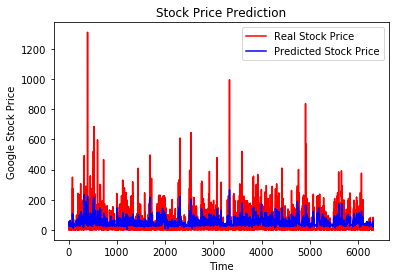

In [39]:
plt.plot(original, color = 'red', label = 'Real Stock Price')
plt.plot(pred, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [34]:
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),5)))[:,0]

In [37]:
original_copies_array = np.repeat(testY,5, axis=-1)
original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),5)))[:,0]

In [38]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- " ,original)

Pred Values--  [29.82742  28.996193 28.823366 ... 59.28958  51.279602 42.77947 ]

Original Values--  [ 1.          5.          7.66666667 ...  7.         39.
  1.58333333]


In [40]:
df_30_days_past=df.iloc[-30:,:]
df_30_days_past.tail()

duration  cpu    memory  instances_num  disk
submit_time                                               
31751         5.000000  0.5  0.004121              1     0
31752        85.000000  0.5  0.016338              1     0
31753         7.000000  0.5  0.008055              2     0
31754        39.000000  0.5  0.005736              3     0
31755         1.583333  0.5  0.004173           6818     0